In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [23]:
df = pd.read_csv("economic_index.csv")

In [24]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [25]:
df.drop(columns=['Unnamed: 0', 'year','month'],axis=1,inplace=True)

In [26]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [27]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

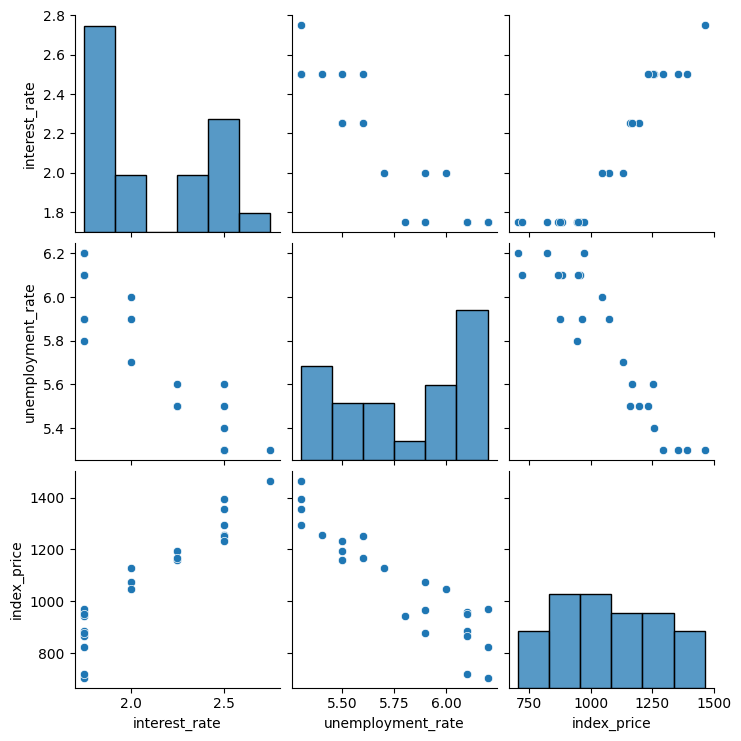

In [28]:
import seaborn as sns
sns.pairplot(df)

Text(0, 0.5, 'Unemployment rate')

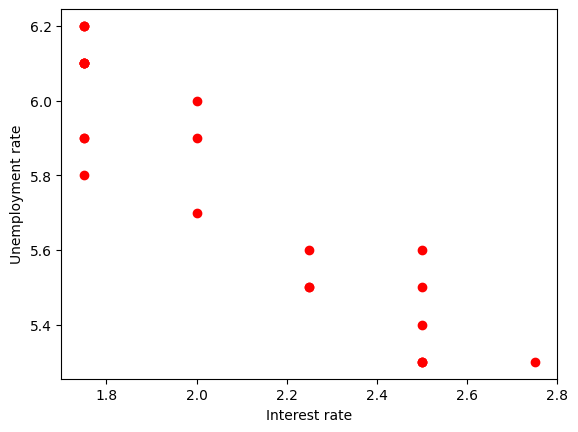

In [29]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel('Interest rate')
plt.ylabel('Unemployment rate')

In [30]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [31]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [32]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [33]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [36]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

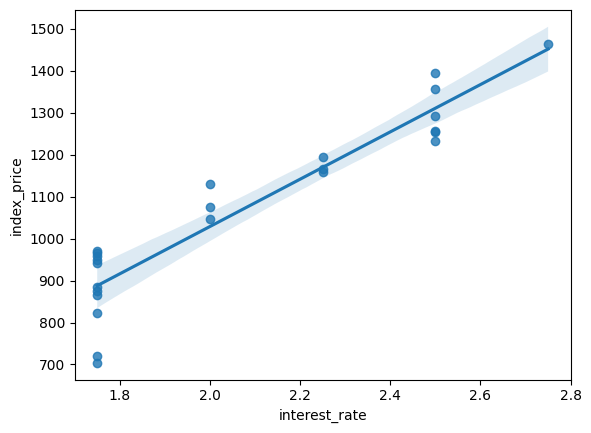

In [39]:
sns.regplot(x='interest_rate', y='index_price', data=df)


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

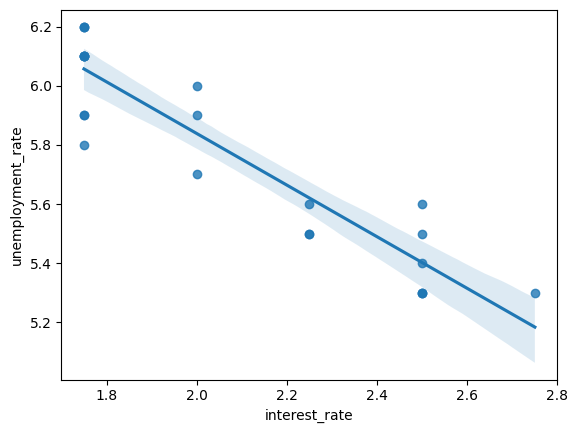

In [40]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df)


<Axes: xlabel='index_price', ylabel='unemployment_rate'>

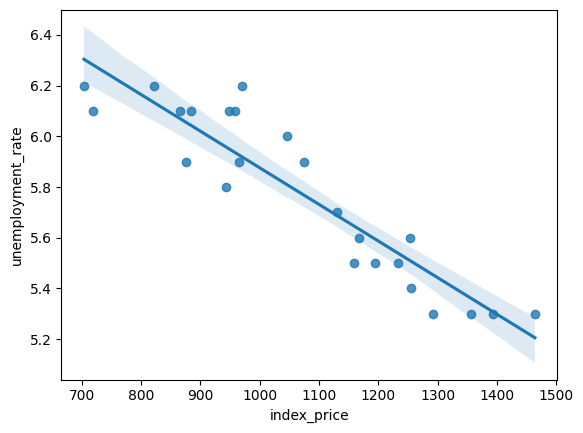

In [42]:
sns.regplot(x='index_price', y='unemployment_rate', data=df)


In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [46]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [47]:
regression.fit(X_train,y_train)

LinearRegression()

In [49]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [50]:
np.mean(validation_score)

np.float64(-5914.828180162388)

In [51]:
y_pred = regression.predict(X_test)

In [52]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


In [56]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.8278978091457145
0.7131630152428576


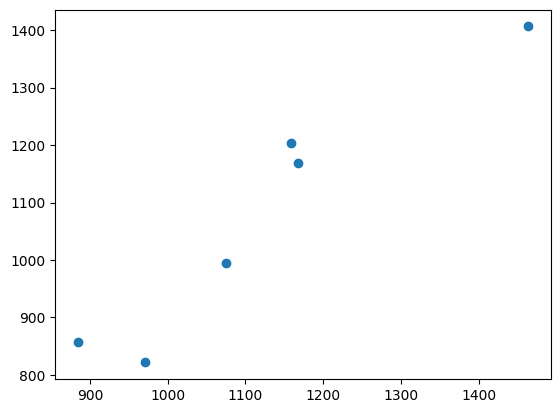

In [57]:
plt.scatter(y_test,y_pred)

In [58]:

residuals=y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


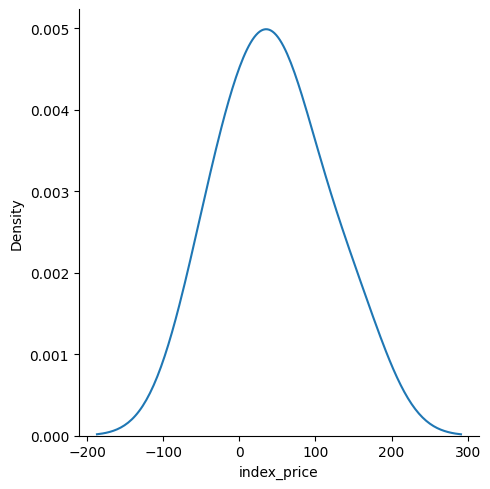

In [61]:
## Plot this residuals
sns.displot(residuals,kind='kde')

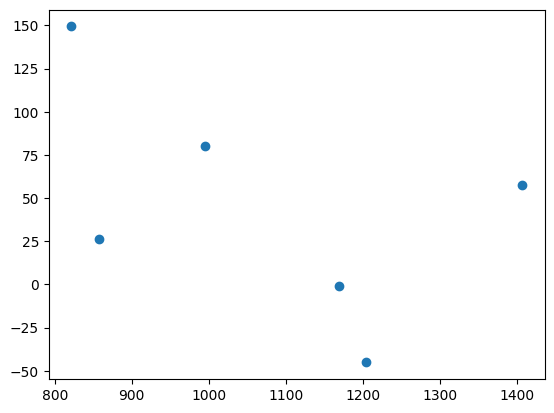

In [62]:
plt.scatter(y_pred,residuals)

In [65]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()

In [67]:
model.summary()

c:\Users\yashs\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 02 Jul 2025   Prob (F-statistic):                       0.754
Time:                        01:16:07   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
print(regression.coef_)

[  88.27275507 -116.25716066]
